Evolutionary dynamics of organised crime and terrorist networks in an network explicit configuration
---

Louis Weyland

In [32]:
"""Importing all the modules."""
import os
import sys
from collections import defaultdict
from typing import Any, DefaultDict, List

import matplotlib.pyplot as plt
import numpy as np
from fitter import Fitter, get_common_distributions
from IPython.display import IFrame

# Get directory first
path = os.getcwd()
par_dir = os.path.abspath(os.path.join(path, "../../"))
# Import own module
sys.path.append(par_dir)
if True:
    from network_utils.network_converter import NetworkConverter
    from network_utils.network_reader import NetworkReader
    from network_utils.network_stats import NetworkStats
    from simulators.meta_simulator import MetaSimulator
    from simulators.sim_mart_vaq import SimMartVaq
    from utils.plotter import Plotter

In [2]:
# Set plotter
plotter = Plotter()
plotter.args.draw_network = "n"

In [3]:
# IFrame("https://www.nature.com/articles/s41598-019-46141-8.pdf", width=1200, height=500)

### Overview of the data

In [4]:
# IFrame("https://arxiv.org/pdf/2003.05303.pdf", width=1000, height=500)

In [3]:
# Get stats about network_obj
network_name = "montagna_calls"
nx_network = NetworkReader().get_data(network_name)
nk_network = NetworkConverter.nx_to_nk(nx_network)
network_stats = NetworkStats(nk_network)
network_stats.get_overview()

'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Graph must be connected! Otherwise distance == inf


----------------------------
Network Properties:
nodes, edges			95, 120
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.026876
clustering coefficient		0.116725
min/max/avg degree		1, 25, 2.526316
degree assortativity		-0.074455
number of connected components	5
size of largest component	84 (88.42 %)
Communities detected in 0.02025 [s]
solution properties:
-------------------  ---------
# communities        10
min community size    2
max community size   21
avg. community size   9.5
modularity            0.631285
-------------------  ---------
Calculating best minimal value for power law fit


----------------------------


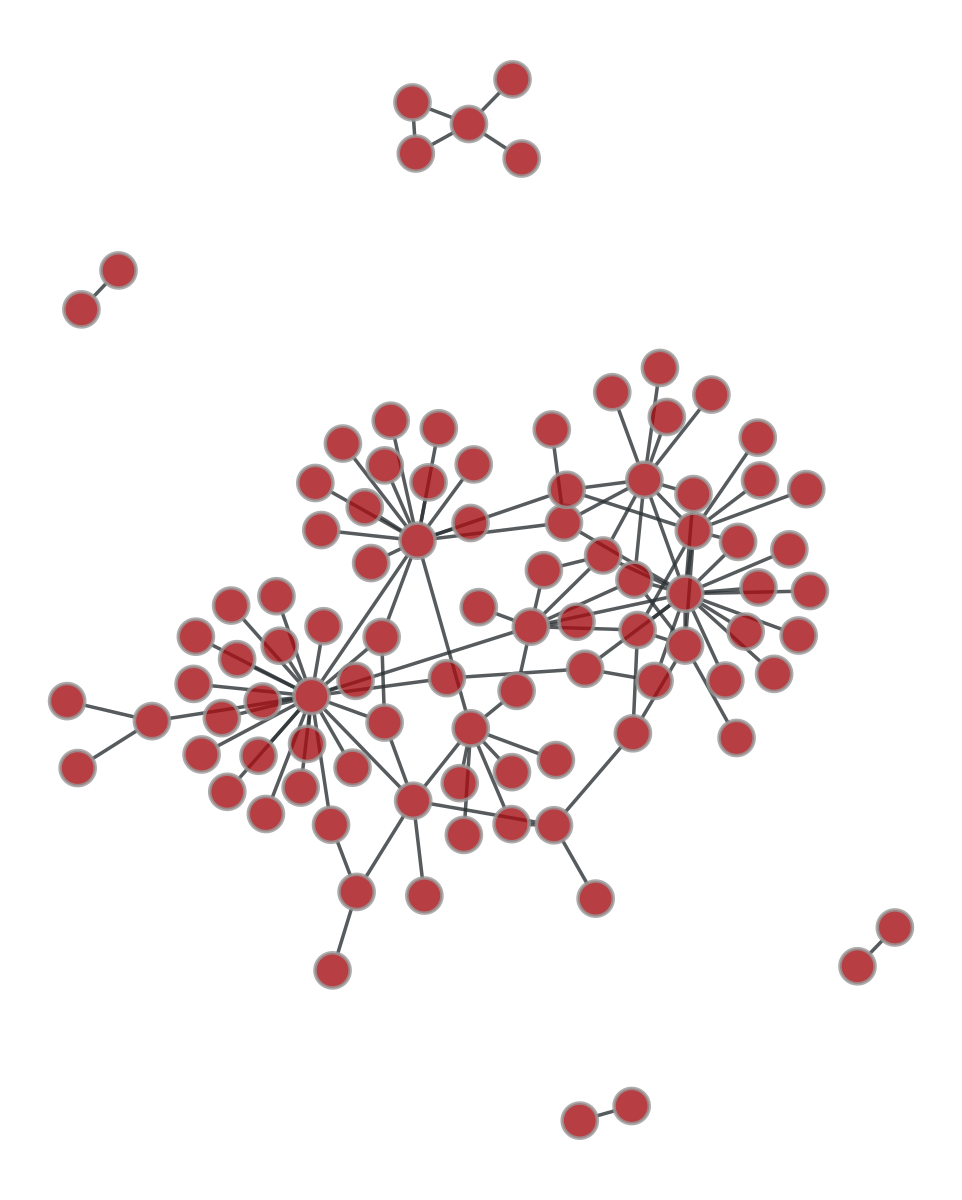

In [4]:
# Plot the network
gt_network = NetworkConverter.nx_to_gt(nx_network)
plotter.draw_network(gt_network)

Calculating best minimal value for power law fit
is_powerlaw=(False, 2.6963785729521623)
Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


<AxesSubplot:xlabel='Degree', ylabel='Count'>

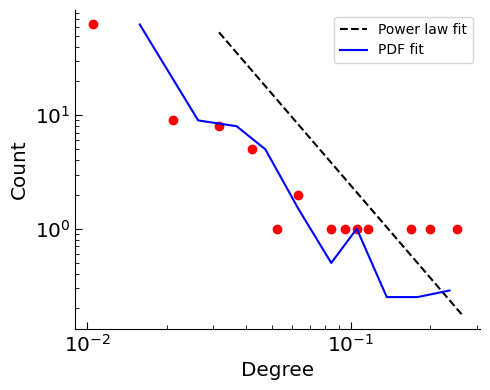

In [5]:
# Plot degree distribution
is_powerlaw = network_stats.check_if_powerlaw(network_stats.get_degree_distribution())
print(f"{is_powerlaw=}")
plotter.plot_log_log(
    network_stats.get_degree_distribution(), x_label="Degree", y_label="Count"
)

### Building around the data by using preferential attachment

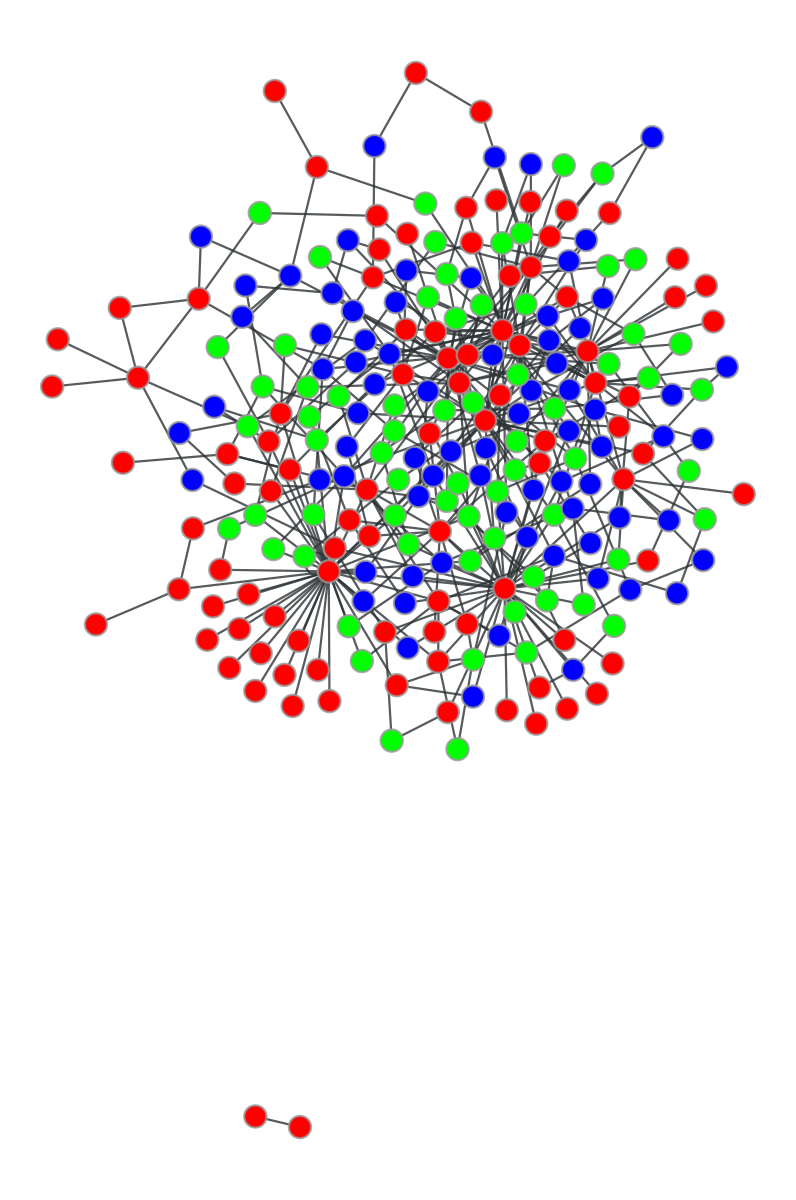

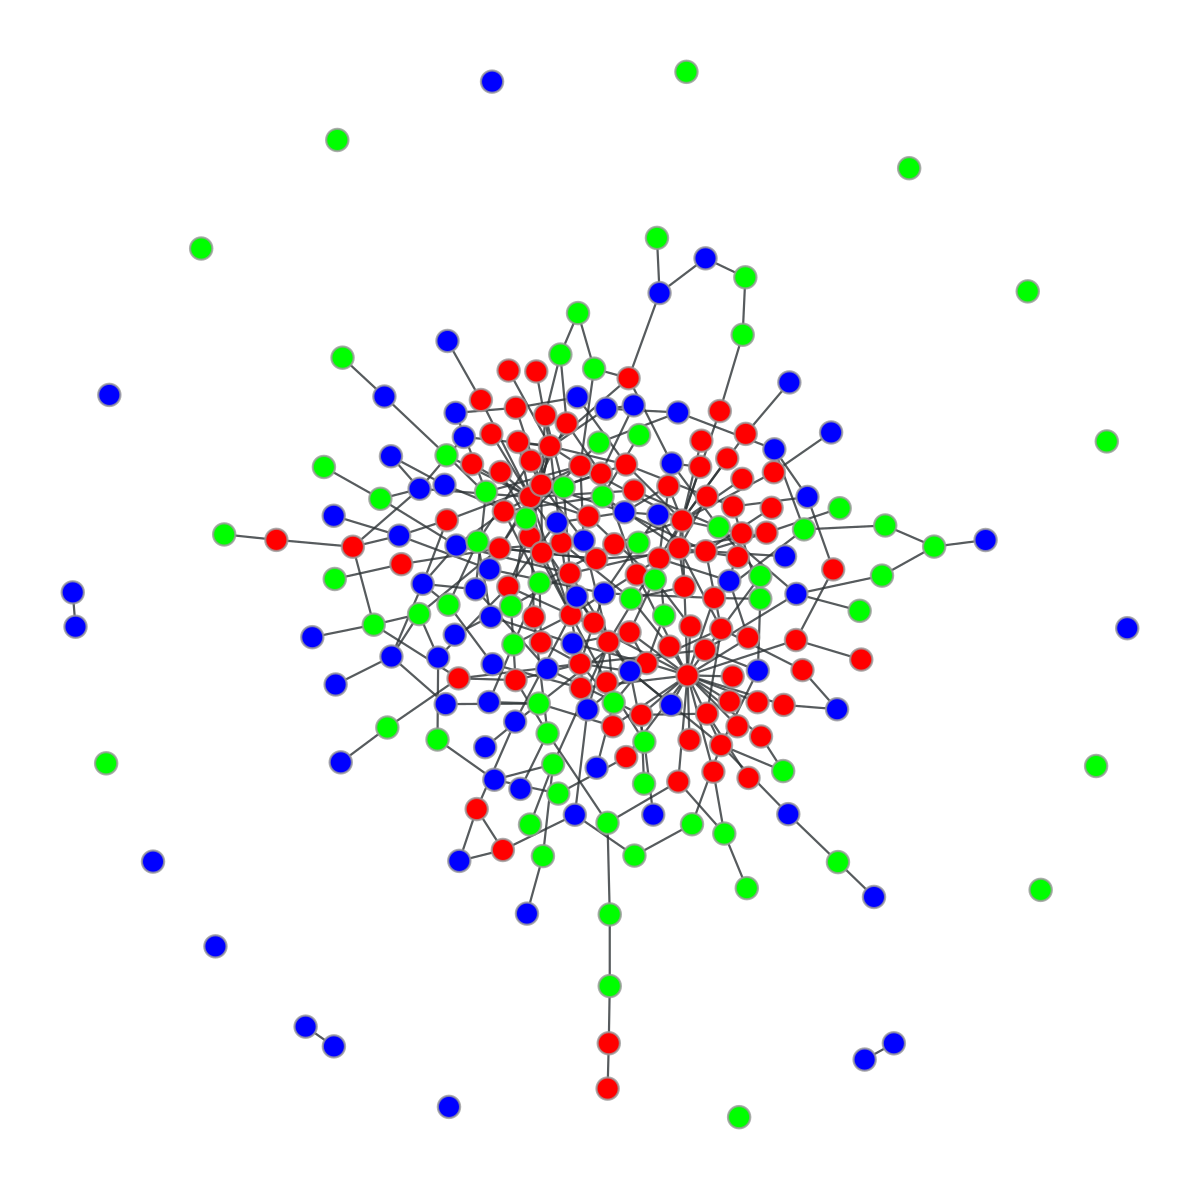

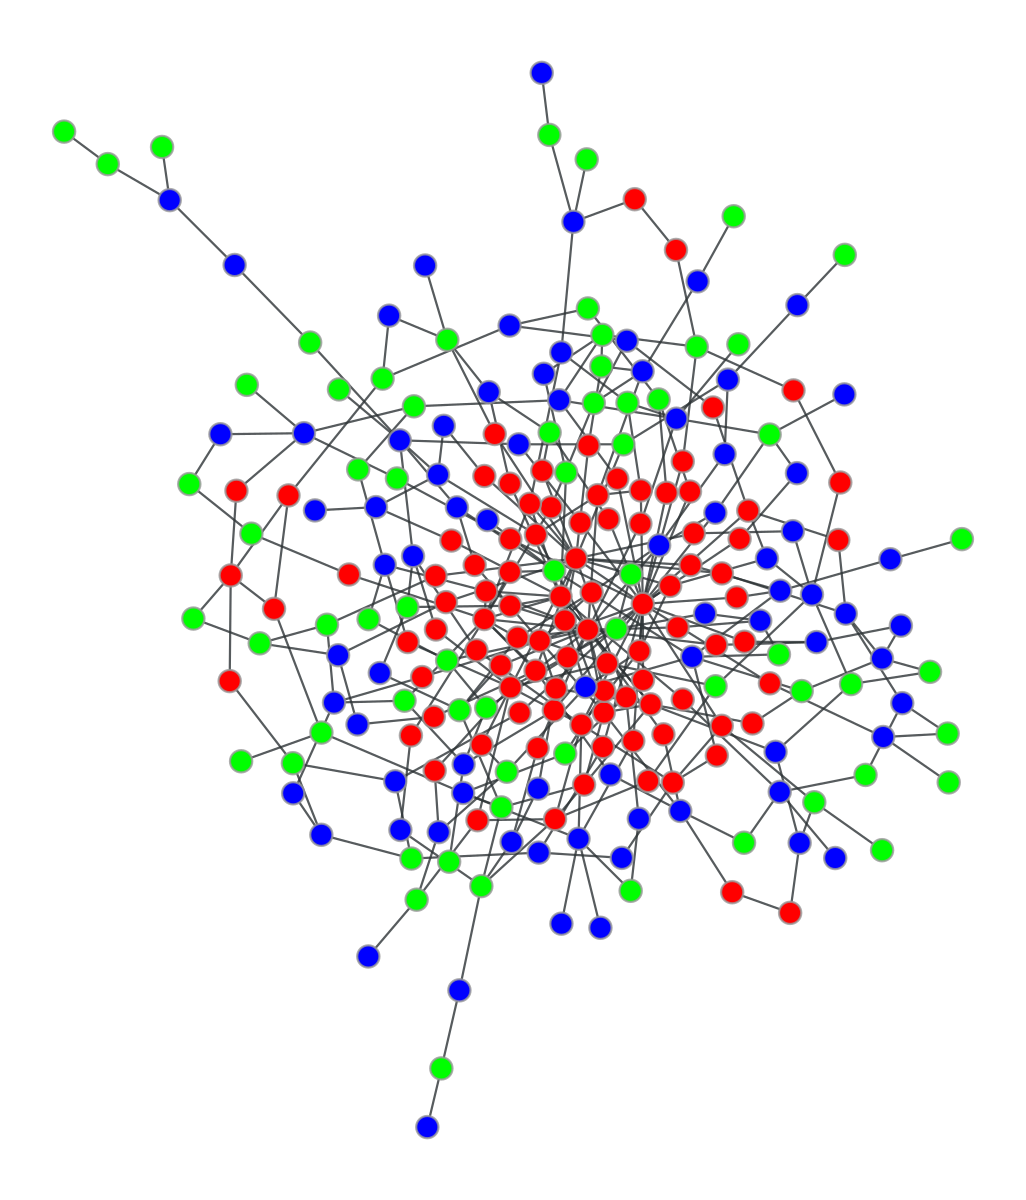

In [19]:
# Adding nodes based on preferential attachment
meta_sim_pref = MetaSimulator(
    network_name=network_name,
    ratio_honest=0.3,
    ratio_wolf=0.3,
    n_new_edges=2,
    attachment_method="preferential",
)
meta_sim_rand = MetaSimulator(
    network_name=network_name,
    ratio_honest=0.3,
    ratio_wolf=0.3,
    prob=0.01,
    attachment_method="random",
)
meta_sim_sw = MetaSimulator(
    network_name=network_name,
    ratio_honest=0.3,
    ratio_wolf=0.3,
    prob=0.6,
    k=4,
    attachment_method="small-world",
)

simulators_pref = SimMartVaq(network=meta_sim_pref.network)
simulators_rand = SimMartVaq(network=meta_sim_rand.network)
simulators_sw = SimMartVaq(network=meta_sim_sw.network)

plotter.draw_network(
    network=simulators_pref.network, color_vertex_property="state_color"
)
plotter.draw_network(
    network=simulators_rand.network, color_vertex_property="state_color"
)
plotter.draw_network(network=simulators_sw.network, color_vertex_property="state_color")

In [20]:
# Get overview of the new network
complete_network_stats_pref = NetworkStats(
    NetworkConverter.gt_to_nk(simulators_pref.network)
)
complete_network_stats_rand = NetworkStats(
    NetworkConverter.gt_to_nk(simulators_rand.network)
)
complete_network_stats_sw = NetworkStats(
    NetworkConverter.gt_to_nk(simulators_sw.network)
)

complete_network_stats_pref.get_overview()
complete_network_stats_rand.get_overview()
complete_network_stats_sw.get_overview()

'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Graph must be connected! Otherwise distance == inf


----------------------------
Network Properties:
nodes, edges			237, 804
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.028749
clustering coefficient		0.055341
min/max/avg degree		2, 80, 6.784810
degree assortativity		0.120936
number of connected components	2
size of largest component	235 (99.16 %)
Communities detected in 0.00050 [s]
solution properties:
-------------------  ---------
# communities        11
min community size    2
max community size   37
avg. community size  21.5455
modularity            0.544464
-------------------  ---------
Calculating best minimal value for power law fit


----------------------------
----------------------------
Network Properties:
nodes, edges			237, 656
directed?			False
weighted?			False
isolated nodes			16
self-loops			0
density				0.023457
clustering coefficient		0.028260
min/max/avg degree		0, 52, 5.535865
degree assortativity		0.146740
number of connected components	20
size of largest component	215 (90.72 %)


Values less than or equal to 0 in data. Throwing out 0 or negative values
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Graph must be connected! Otherwise distance == inf


Communities detected in 0.09544 [s]
solution properties:
-------------------  ---------
# communities        31
min community size    1
max community size   27
avg. community size   7.64516
modularity            0.632153
-------------------  ---------
Calculating best minimal value for power law fit


----------------------------
----------------------------
Network Properties:
nodes, edges			237, 714
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.025531
clustering coefficient		0.018806

'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.



min/max/avg degree		2, 52, 6.025316
degree assortativity		0.052352
number of connected components	1
size of largest component	237 (100.00 %)
Communities detected in 0.00048 [s]
solution properties:
-------------------  ---------
# communities        13
min community size    9
max community size   32
avg. community size  18.2308
modularity            0.639883
-------------------  ---------
Calculating best minimal value for power law fit


----------------------------


Calculating best minimal value for power law fit
is_powerlaw=(False, 3.076747334476806)
Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


Calculating best minimal value for power law fit
is_powerlaw=(False, 4.272572164847364)
Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


Calculating best minimal value for power law fit
is_powerlaw=(False, 4.857878453300554)
Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


<AxesSubplot:xlabel='Degree', ylabel='Count'>

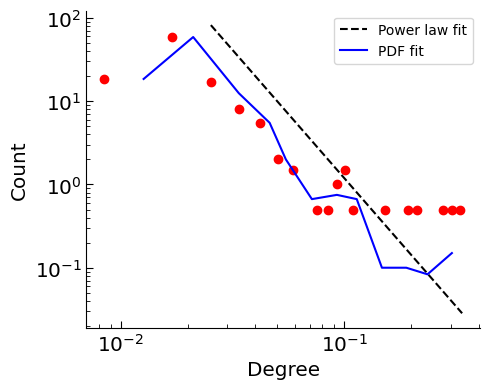

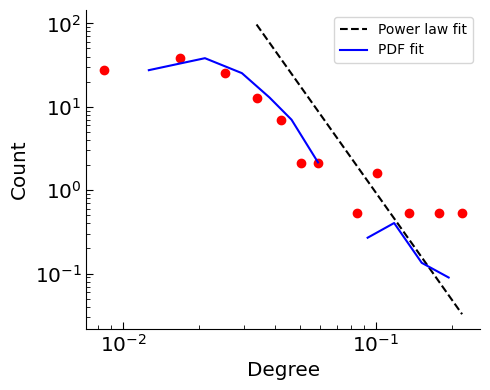

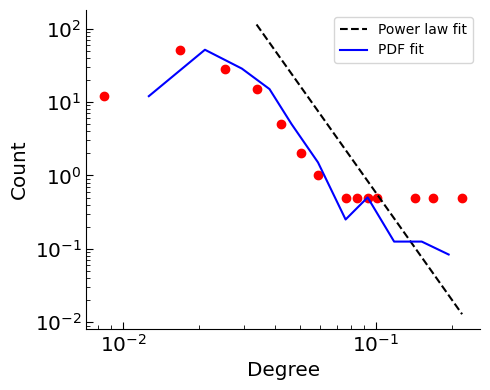

In [67]:
# Plot degree distribution
is_powerlaw = complete_network_stats_pref.check_if_powerlaw(
    complete_network_stats_pref.get_degree_distribution()
)
print(f"{is_powerlaw=}")
plotter.plot_log_log(
    complete_network_stats_pref.get_degree_distribution(),
    x_label="Degree",
    y_label="Count",
)

# Plot degree distribution
degree_dist_arr = np.array(complete_network_stats_rand.get_degree_distribution())
is_powerlaw = complete_network_stats_rand.check_if_powerlaw(
    degree_dist_arr[degree_dist_arr != 0]
)
print(f"{is_powerlaw=}")
plotter.plot_log_log(
    degree_dist_arr[degree_dist_arr != 0], x_label="Degree", y_label="Count"
)

# Plot degree distribution
is_powerlaw = complete_network_stats_sw.check_if_powerlaw(
    complete_network_stats_sw.get_degree_distribution()
)
print(f"{is_powerlaw=}")
plotter.plot_log_log(
    complete_network_stats_sw.get_degree_distribution(),
    x_label="Degree",
    y_label="Count",
)

### Dividing the network into groups

In [11]:
# Dividing network into groups
meta_sim = MetaSimulator(
    network_name=network_name,
    ratio_honest=0.8,
    ratio_wolf=0.1,
    n_new_edges=2,
    random_fit_init=True,
)
simulators = SimMartVaq(network=meta_sim.network)

group_dict = simulators.select_multiple_communities(
    simulators.network, radius=2, min_grp=5, max_grp=6
)
color_code = simulators.network.new_vertex_property("int")
simulators.network.vertex_properties["group_color"] = color_code
for k, v in group_dict.items():
    for mbr in v:
        simulators.network.vp.group_color[simulators.network.vertex(mbr)] = k
plotter.draw_network(simulators.network, color_vertex_property="group_color")

,sumsquare_error,aic,bic,kl_div
chi2,0.000083,1471.282082,-11209.342040,inf
gamma,0.000083,1471.282191,-11209.341960,inf
exponpow,0.000091,1487.090814,-11143.243865,inf
expon,0.000100,1457.059694,-11085.832613,inf
rayleigh,0.000124,1540.187183,-10935.148136,inf


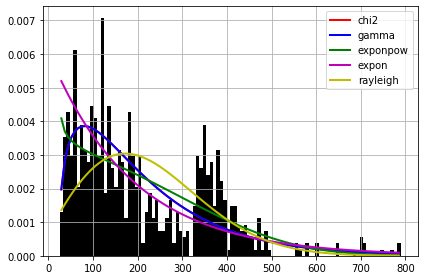

In [12]:
# Get distribution of the groups

group_size_data_collector = defaultdict(list)  # type: DefaultDict[str, List[Any]]
group_size_data_collector["group_size"]
for i in range(0, 100):
    group_dict = simulators.select_multiple_communities(
        simulators.network, radius=3, min_grp=5, max_grp=10
    )
    for k, v in group_dict.items():
        group_size_data_collector["group_size"].append(len(v))
plotter.plot_hist(
    dict_data=group_size_data_collector,
    data_to_plot=["group_size"],
    xlabel="Group Size",
    ylabel="Count",
    title="Group size distribution",
    n_bins=150,
)
f = Fitter(
    group_size_data_collector["group_size"], distributions=get_common_distributions()
)
f.fit()
f.summary()

### Run simulation

In [13]:
SimMartVaq.__init__?

Signature:
SimMartVaq.__init__(
    self,
    network: graph_tool.Graph,
    delta: float = 0.0,
    tau: float = 0.0,
    gamma: float = 0.5,
    beta_s: int = 0,
    beta_h: int = 10,
    beta_c: int = 400,
    c_w: int = 1,
    c_c: int = 1,
    r_w: int = 1,
    r_c: int = 1,
    r_h: int = 0,
    temperature: float = 10,
    mutation_prob: float = 0.3,
) -> None
Docstring:
Init the network characteristics.

Args:
    network (gt.Graph): Initial criminal network
    delta (int, optional): Influence of criminals on the acting of the wolf. Defaults to 0.
    tau (int, optional):Influence of the wolf's action on criminals. Defaults to 0.
    gamma (float, optional): Punishment ratio for the other members of the criminal
                                                            organization. Defaults to 0.5.
    beta_s (int, optional): State punishment value. Defaults to 0.
    beta_h (int, optional): Civil punishment value. Defaults to 10.
    beta_c (int, optional): Criminal punish

In [14]:
# Run simulation 2
meta_sim = MetaSimulator(
    network_name=network_name,
    ratio_honest=0.9,
    ratio_wolf=0.01,
    n_new_edges=2,
    random_fit_init=True,
)
simulators = SimMartVaq(
    network=meta_sim.network,
    delta=0.1,  # no acting for wolfs
    gamma=0.1,
    tau=0.7,  # no fintess sharing between wolf to criminal
    beta_s=10,
    beta_h=5,
    beta_c=25,
    c_c=1,  # no benefits from criminals/ they still act
    r_c=10,
    c_w=1,
    r_w=0.2,
    r_h=0,
    mutation_prob=0.01,  # only fermi function
)
data_collector = simulators.avg_play(
    network=simulators.network, rounds=20000, n_groups=1, repetition=5, ith_collect=20
)

Repeating simulation....: 100%|██████████| 5/5 [00:08<00:00,  1.66s/it]       


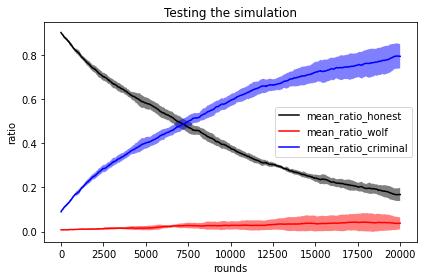

In [15]:
# Show the data
ax_0 = plotter.plot_lines(
    dict_data=data_collector,
    y_data_to_plot=["mean_ratio_honest", "mean_ratio_wolf", "mean_ratio_criminal"],
    x_data_to_plot="mean_iteration",
    title="Testing the simulation",
    xlabel="rounds",
    ylabel="ratio",
    plot_std="True",
)

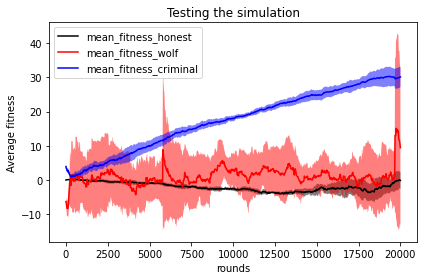

mean_fitness_dict['h']=-0.09751776436270837
mean_fitness_dict['c']=9.174785205560744
mean_fitness_dict['w']=-0.05299699648055718


In [16]:
ax_1 = plotter.plot_lines(
    dict_data=data_collector,
    y_data_to_plot=[
        "mean_fitness_honest",
        "mean_fitness_wolf",
        "mean_fitness_criminal",
    ],
    x_data_to_plot="mean_iteration",
    title="Testing the simulation",
    xlabel="rounds",
    ylabel="Average fitness",
    plot_std="True",
)
plt.show()

mean_fitness_dict = simulators.get_analytical_solution(radius=3)
print(f"{mean_fitness_dict['h']=}")
print(f"{mean_fitness_dict['c']=}")
print(f"{mean_fitness_dict['w']=}")